# 卷积神经网络可视化

### 随着卷积神经网络在图像方面体现出越来越厉害的角色的时候，我们特别想知道卷积神经网络到底在学习什么？

In [1]:
import copy
import torch
import numpy as np
from torchvision import models
import torch.nn as nn
from matplotlib import pyplot as plt
from PIL import Image
from torch.nn import Parameter
%matplotlib inline

In [2]:
vgg16 = models.vgg16(pretrained=True)
_ = vgg16.eval()

In [3]:
layers = [m for m in vgg16.modules() if isinstance(m, nn.Conv2d)]

In [26]:
def plot_kernels(tensor, num_cols=6):
    if not tensor.ndim==4:
        raise Exception("assumes a 4D tensor")
    if not tensor.shape[-1]==3:
        raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        tensor += 0.1
        ax1.imshow(np.abs(tensor[i]))
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

In [33]:
first_layer = layers[0].weight.data.numpy()

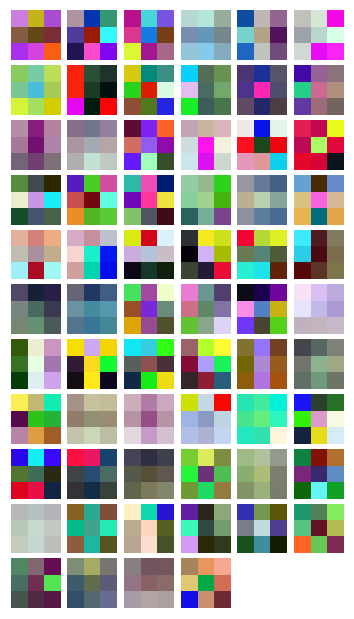

In [34]:
plot_kernels(first_layer)